Data Exploration:

   # Step 1: Data Collection

Goal: Gather data from various sources (databases, files, APIs, etc.).

Key Actions:

Identify and access relevant data sources.
Ensure data formats are compatible with processing tools.

Output: data collected from the given link which are in the structured CSV format


In [2]:
# importing required libraries
import pandas as pd  # pandas library
import numpy as np   # numphy library
import random        # random generation of number
import os            # to see the path of the current file

In [2]:
print(os.getcwd()) # displays the current path of file

c:\Users\JalpaZenisha\DSI\DSI_Team_Project_Bank_Marketing\experiments


In [3]:
#Reading Dataset
df = pd.read_csv('../data/raw/bank-full.csv',sep=';')  # reading the full dataset of bank
print(df.head())
print(df.shape)
# Reading the subset of full bank dataset
df_sub = pd.read_csv('../data/raw/bank.csv',sep=';')  # reading the subset(Sampling) dataset of bank
print(df_sub.head())
print(df_sub.shape)


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
(45211, 17)
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  marri

The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 

      1) bank-full.csv with all examples (45211), ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
      
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

1. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

2. Number of Attributes: 16 + output attribute.

3. Attribute information:

   Input variables:
   
**bank client data:**

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 

   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")

   5 - default: has credit in default? (binary: "yes","no")

   6 - balance: average yearly balance, in euros (numeric)

   7 - housing: has housing loan? (binary: "yes","no")

   8 - loan: has personal loan? (binary: "yes","no")

   **related with the last contact of the current campaign:**

   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

   10 - day: last contact day of the month (numeric)

   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

   12 - duration: last contact duration, in seconds (numeric)

   **other attributes:**

   13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

   14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

   15 - previous: number of contacts performed before this campaign and for this client (numeric)

   16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  

  Output variable (desired target):
   17 - y - has the client subscribed a term deposit? (binary: "yes","no")

4. Missing Attribute Values: None

In [ ]:
# Exploring the data completeness and data type of our variables
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Initial Observations:**

The datasets contain customer information, including demographics, account details, and outcomes of bank marketing campaigns.

All columns contain 45,211 non-null values, meaning there are no missing values in any column.
This ensures data completeness, which is a positive aspect since no immediate imputation or removal of rows is necessary.

Data types appear consistent, with a mix of integers and categorical (object) data.
The target variable (y) indicates whether a customer subscribed to a term deposit.

7 columns are of data type int64 (integer).
These columns are numerical and likely represent continuous or discrete variables.

10 columns are of data type object.
These are categorical variables and may need to be encoded into numerical values if we are going to use them as features in our model.



In [5]:
# Get descriptive statistics for numerical columns
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Insights from the Data (statistics output)**

Age: The average client age is 40.936 = 41 years, with a range from 18(min) to 95(max).

Balance: The average balance is €1362, with a large variability (std = €3044), with extreme (possible outliers) values -8019 euro and 102127 euro.

Duration: The average call duration is 258 seconds (approx 4 minutes).

Campaign: Most clients were contacted on an average of 3 times, between 1 and 3 times most of the clients. with extreme (possible outlier) value of 63 times.

Previous: Most clients were contacted first time for this campaign. with extreme(possible outlier) value 275 times.

Below are the Possible Outliers: (to investigate)

Balance: A minimum balance of -€8019 and a maximum balance of €102,127, indicating a few extreme values.

Duration: Calls as short as 0 seconds and as long as 4918 seconds ( approx 82 minutes), suggesting potential outliers.

Campaign: Some clients were contacted up to 63 times, which is unusually high.

Previous: some clients were contacted 275 times previously before this campaign.


# Exploratory Visualization of initial data: 

In [6]:
# Visualize distributions (e.g., histograms or boxplots)
import seaborn as sns
import matplotlib.pyplot as plt



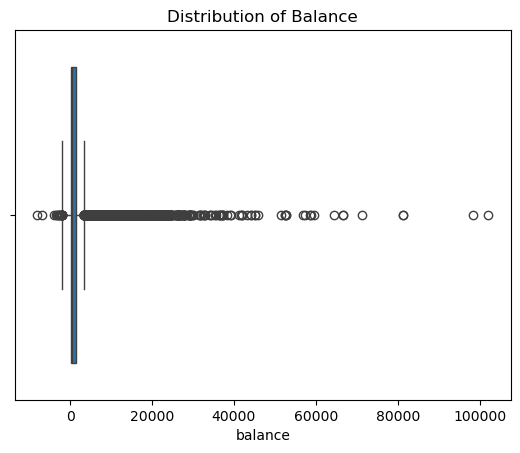

In [7]:
#  Boxplot for 'balance'. Helps to identify the outliers or skewed distribution
sns.boxplot(x=df['balance'])
plt.title("Distribution of Balance")
plt.show()


We can obseve that balance amount around 100000 are outliers for the data

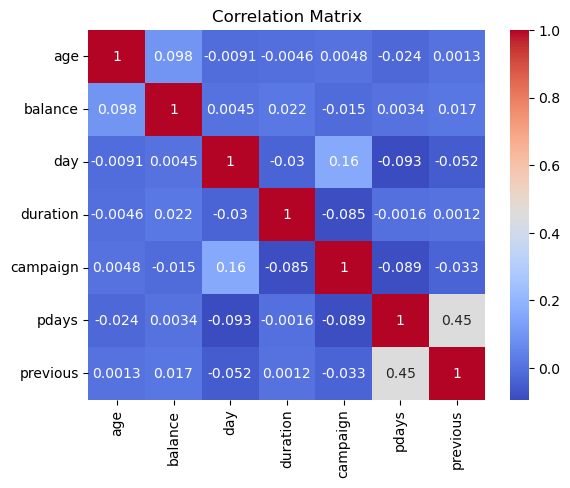

In [9]:
# Correlation matrix
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


From Correlation Matrix we can observe that, 
- pdays and previous = 0.45 
- day and campaign = 0.16
- age and balance = 0.098

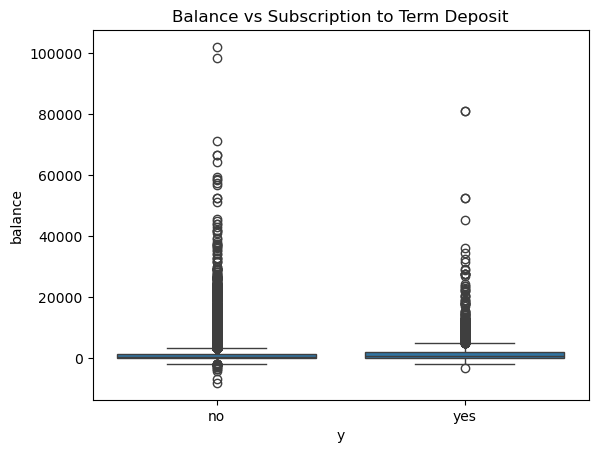

In [12]:
#  Relationship between 'balance' and 'y'
sns.boxplot(x=df['y'], y=df['balance'])
plt.title("Balance vs Subscription to Term Deposit")
plt.show()



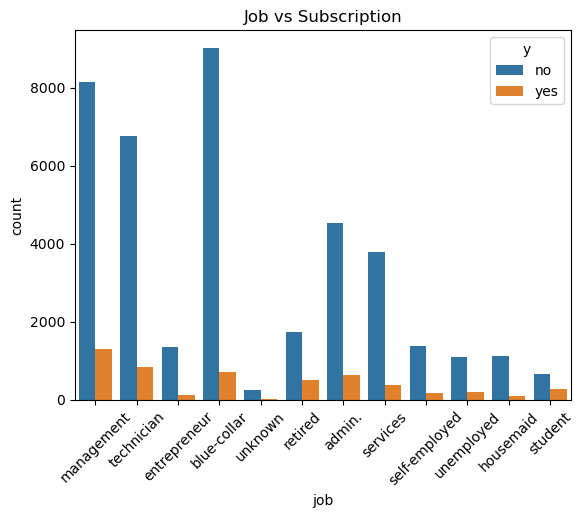

In [10]:
# Frequency of 'job' types for each outcome
sns.countplot(data=df, x='job', hue='y')
plt.title("Job vs Subscription")
plt.xticks(rotation=45)
plt.show()

# Insights:
# Understand which features might influence the target variable.
# Identify trends or patterns (e.g., specific job types subscribing more).


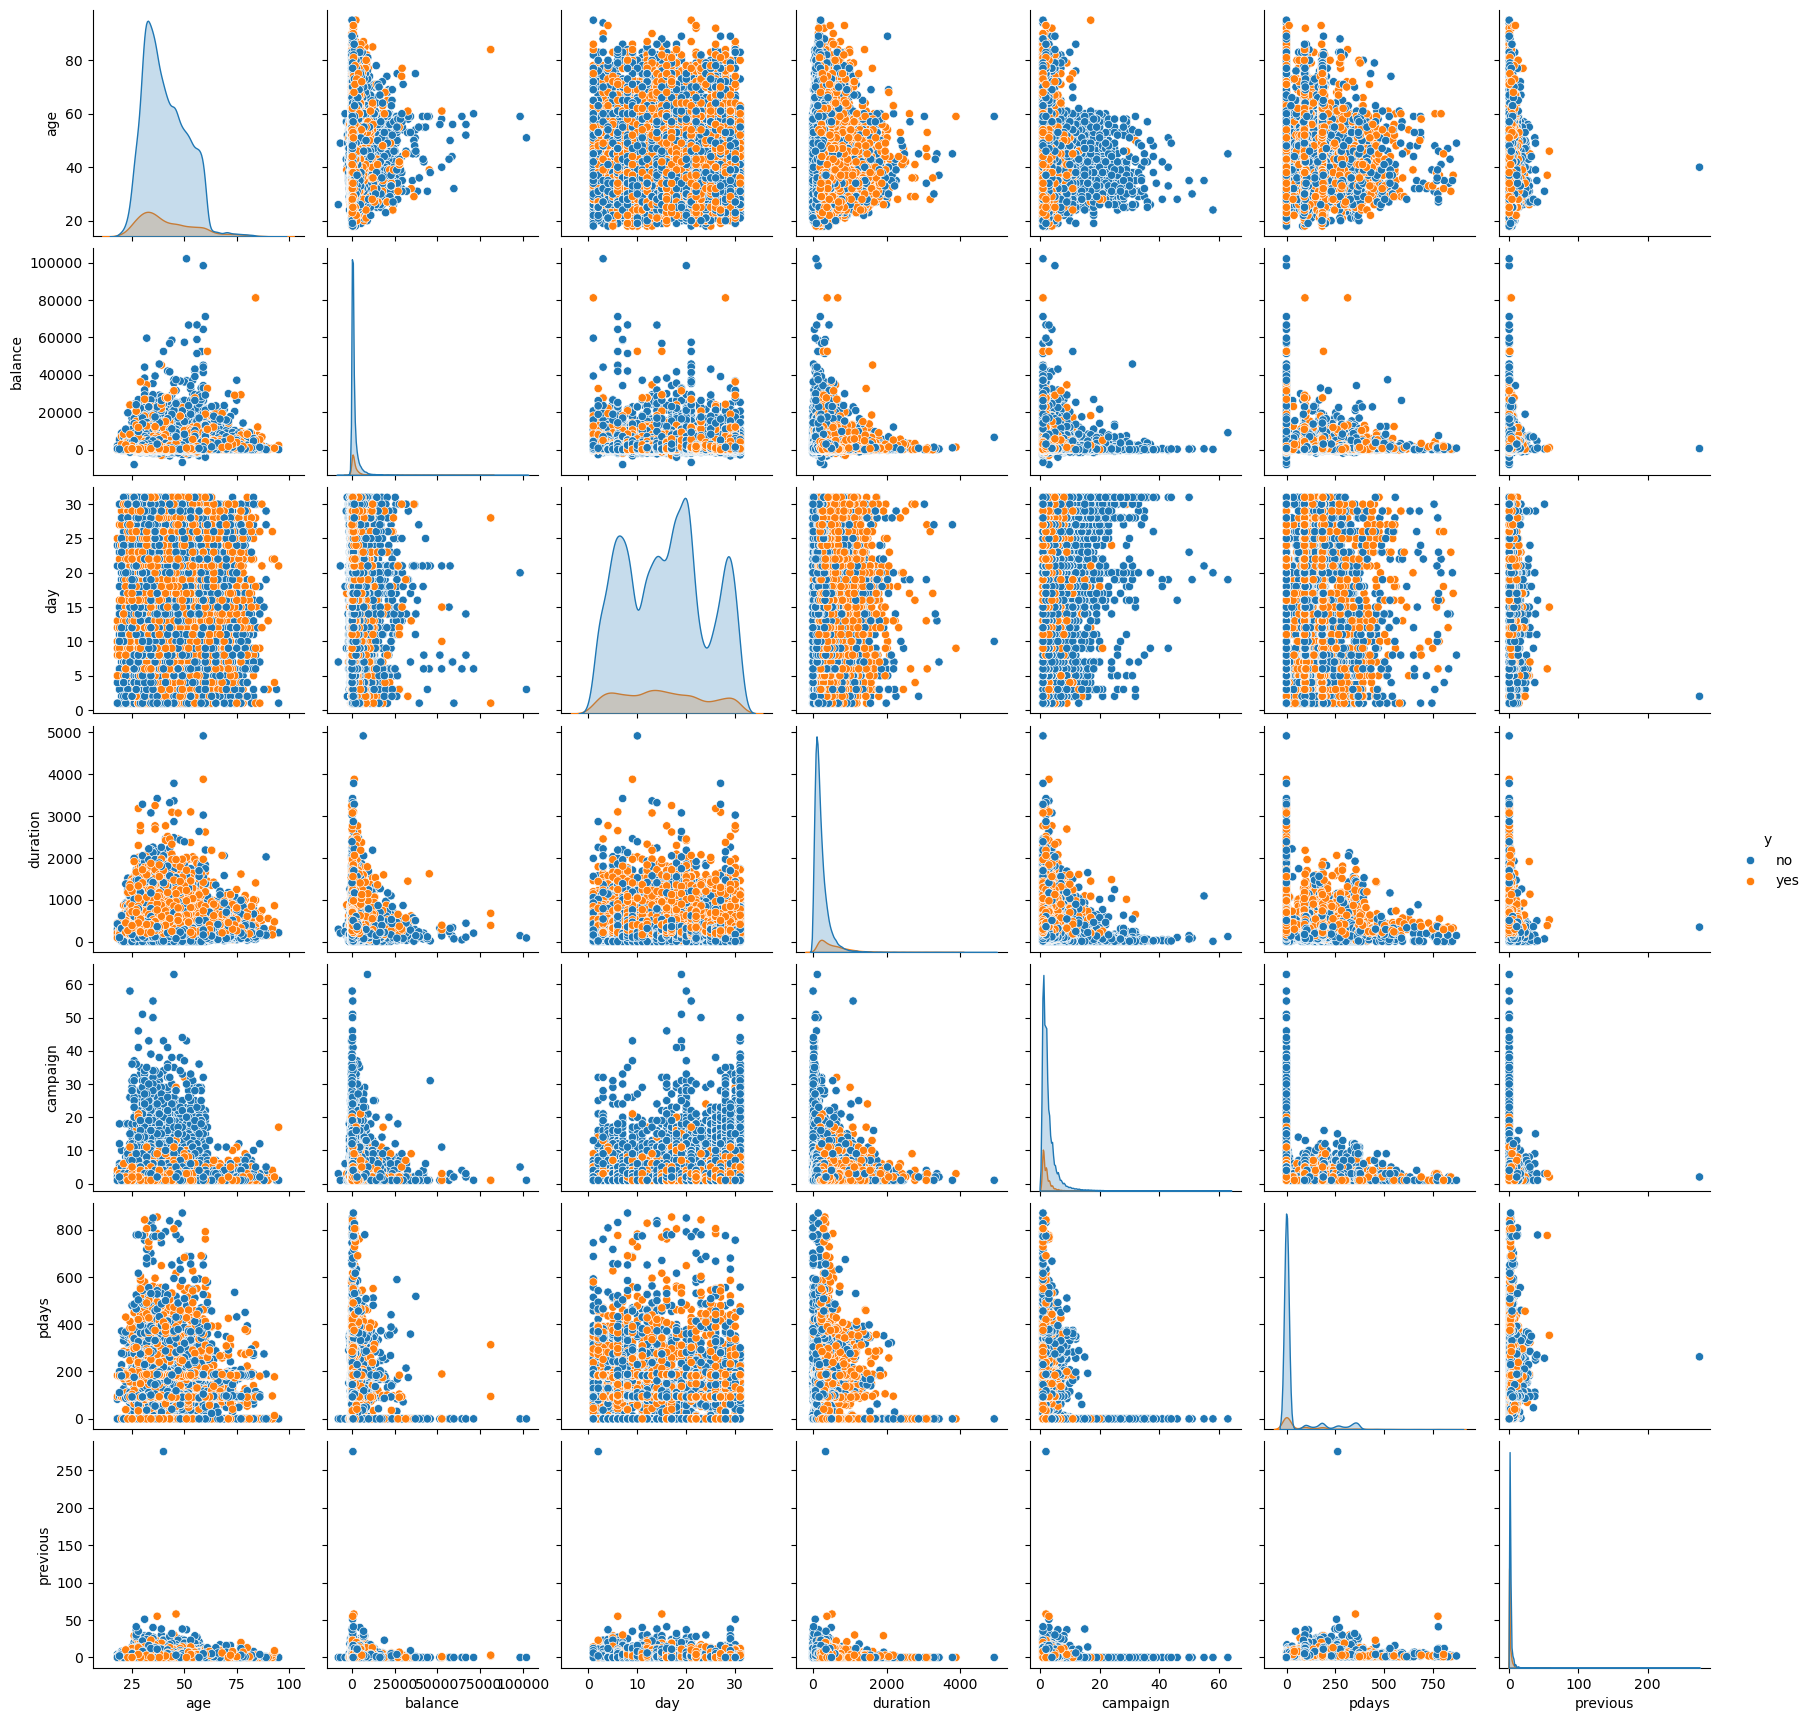

In [13]:
# Pairwise plots help visualize relationships between features.

sns.pairplot(df, vars=numerical_columns, hue='y', diag_kind="kde")
plt.show()


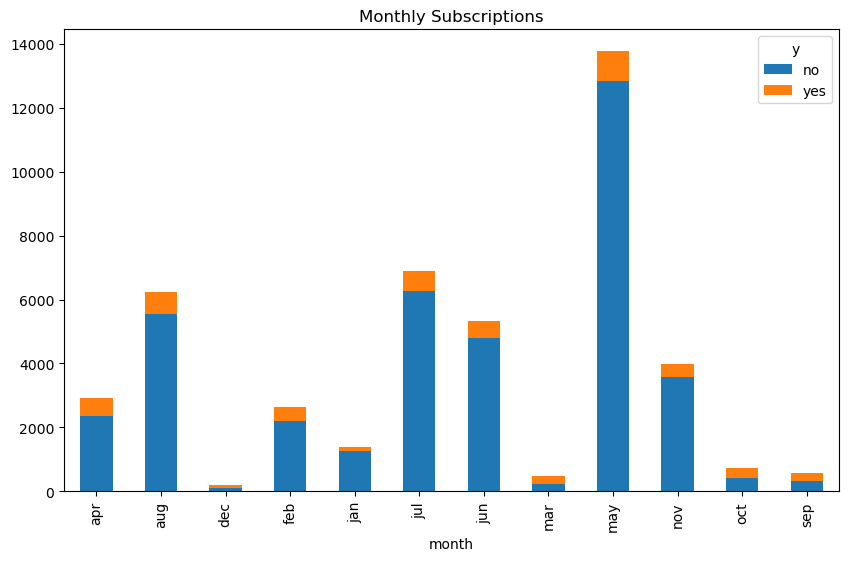

In [15]:
# analyze trends over time (by month).
# Aggregate subscriptions by month
monthly_data = df.groupby('month')['y'].value_counts().unstack()
monthly_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Monthly Subscriptions")
plt.show()



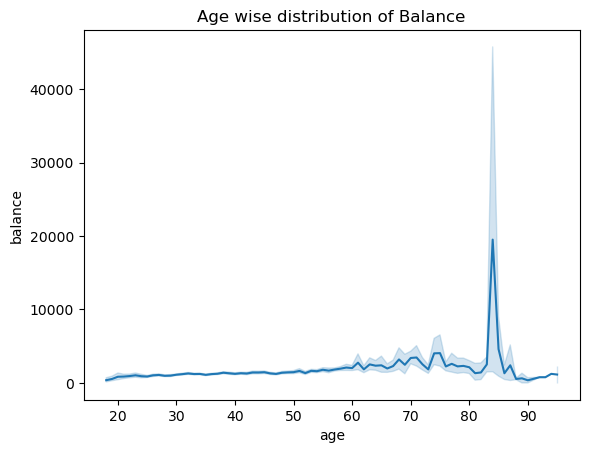

In [16]:
#  line plot for 'balance'. Helps to identify the outliers or skewed distribution
sns.lineplot(data = df,
             x = 'age',
             y = 'balance')
plt.title("Age wise distribution of Balance")
plt.show()


In [22]:
# Use automated libraries like Pandas Profiling or Sweetviz to generate comprehensive reports.

%pip install pandas-profiling sweetviz


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
    --------------------------------------- 0.3/15.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.1 MB 2.1 MB/s eta 0:00:07
   - -------------------------------------- 0.5/15.1 MB 2.1 MB/s eta 0:00:07
   -- ------------------------------------- 1.0/15.1 MB 1.1 MB/s eta 0:00:13
   ---- ----------------------------------- 1.8/15.1 MB 1.7 MB/s eta 0:00:08
   ------- -------------------------------- 2.9/15.1 MB 2.3 MB/s eta 0:00:06
   --------- ------------------------------ 3.7/15.1 MB 2.6 MB/s eta 0:00:05
   ------------ --------------------------- 4.7/15.1 MB 2.9 MB/s eta 0:00:04
   ------------- -------------------------- 5.2/15.1 MB 2.9 MB/s eta 0:00:04
   ---------------- ----------------------- 6.3/15.1 MB 3.1 MB/s eta 0:00:03
   -------------------- ------------------- 7.6/15.1 MB 3.3 MB/s 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
#  pair plot for 'balance'. 
# sns.pairplot(data = df['balance','job'],
#              hue = 'age')
#plt.title("Age wise distribution of Balance")
#plt.show()


In [ ]:
#  pmulti varibale plot for 'balance'. Helps to identify the outliers or skewed distribution
clientgraph = sns.scatterplot(data = df,
                              x =  
                              hue = 'age')
#plt.title("Age wise distribution of Balance")
#plt.show()


   # Step 2: Data Cleaning and Transformation:

The initial step involves cleaning and preparing the raw data to remove inconsistencies, handle missing values, and make the dataset ready for analysis. 

1. Check for Missing Values: Ensure there are no null values.
2. Handle Duplicates: Identify and remove any duplicate rows.
3. Standardize Data: Ensure consistent formats for categorical data (e.g., month values).


In [ ]:
# Check for missing values in both datasets
missing = df.isnull().sum()
missing_sub = df_sub.isnull().sum()

# Identify duplicate rows: Check for duplicates in both datasets
duplicates = df.duplicated().sum()
duplicates_sub = df_sub.duplicated().sum()

missing, missing_sub, duplicates, duplicates_sub


Looks like there are no missing values in our data. However, if we look at the categorical data there are 'unknown' value which we can consider as 'missing' data.

Also, there are no duplicates rows in our data.

In [1]:
# selected only categorical columns

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# count unknown values in each column

unknown_counts = df[categorical_columns].apply(lambda col: (col == "unknown").sum())

print(unknown_counts) # the output will give unknown counts for each categorical columns

NameError: name 'df' is not defined

To standardize the data in the bank-full.csv file, follow these steps:

1. Separate Numerical and Categorical Columns
Start by identifying which columns are numerical and which are categorical.
2. Standardize Numerical Columns
Use StandardScaler from sklearn to scale numerical features:
This step transforms the numerical features to have a mean of 0 and standard deviation of 1.
3. Clean and Standardize Categorical Data
(a) Clean Values
Use string operations to ensure consistency:
for col in categorical_columns:
    data_full_parsed[col] = data_full_parsed[col].str.lower().str.strip()

(b) Encode Categorical Values
Depending on the type of categorical data:

1. Label Encoding for ordinal data:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_columns:
    data_full_parsed[col] = le.fit_transform(data_full_parsed[col])


2. One-Hot Encoding for nominal data:

data_full_parsed = pd.get_dummies(data_full_parsed, columns=categorical_columns, drop_first=True)

4. Validate the Standardization
After standardization, check that the numerical data has been scaled correctly and the categorical data is encoded:


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Standardize the values (numerical and categorical)


# Separate columns
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Standardize numerical data
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Clean and encode categorical data
for col in categorical_columns:
    df[col] = df[col].str.lower().str.strip()

# Encode nominal categorical data (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Validate changes

print(df.describe())  # For numerical columns
print(df.head())     # To verify encoded categorical columns
#print(df.size)
df_encoded.shape

In [ ]:
# Replace True and False with 1 and 0

df_coded = df.replace({True : 1, False : 0})

df_coded

In [ ]:
# Validate the data 
# unique values for each column

# unique_counts = df[categorical_columns].nunique()
# print("Each column has unique values counts:") 
# print(unique_counts)

# Unique values for each column 
# df_unique_values = {column: df[column].unique() for column in categorical_columns} 

# for column, values in df_unique_values.items(): 
#     print(f"{column}: {values}")

Which shows the size of our dataset df is 45211 rows and 43 columns

# Step 3: Data Visualization:

Goal: Represent data insights visually for better understanding.

Key Actions:

Use tools like Matplotlib, Seaborn, Power BI, or Tableau.
Create charts, graphs, and dashboards.

In [ ]:
import matplotlib.pyplot as plt
import scipy 

In [ ]:
# Visualize distributions (e.g., histograms or boxplots)
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for 'balance'
sns.boxplot(x=df['balance'])
plt.title("Distribution of Balance")
plt.show()
